# Neural Network

###### Default of credit card clients: This research aimed at the case of customers default payments in Taiwan. From the perspective of risk management, the result of predictive accuracy of the estimated probability of default will be more valuable than the binary result of classification - credible or not credible clients. 

###### Location: http://archive.ics.uci.edu/ml/datasets/default+of+credit+card+clients#

In [1]:
import math
import numpy as np
import pandas as pd
from datetime import datetime

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn-whitegrid')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

# Get the Data

**We tracked the past monthly payment records (from April to September, 2005) as follows: **
* X1: Amount of the given credit (NT dollar)
* X2: Gender (1 = male; 2 = female)
* X3: Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). 
* X4: Marital status (1 = married; 2 = single; 3 = others). 
* X5: Age (year)
* X6 - X11: History of past payment. X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above. 
* X12-X17: Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. 
* X18-X23: Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 

In [2]:
df = pd.read_csv('default of credit card clients.csv',sep=',')
df.columns = ['LIMIT_BAL','SEX','EDUCATION','MARRIAGE','AGE',
              'PAY_SEP05','PAY_AUG05','PAY_JUL05','PAY_JUN05','PAY_MAY05','PAY_APR05',
              'BILLAMT_SEP05','BILLAMT_AUG05','BILLAMT_JUL05','BILLAMT_JUN05','BILLAMT_MAY05','BILLAMT_APR05',
              'PAYAMT_SEP05','PAYAMT_AUG05','PAYAMT_JUL05','PAYAMT_JUN05','PAYAMT_MAY05','PAYAMT_APR05','DEF_FLAG']
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
LIMIT_BAL        30000 non-null int64
SEX              30000 non-null int64
EDUCATION        30000 non-null int64
MARRIAGE         30000 non-null int64
AGE              30000 non-null int64
PAY_SEP05        30000 non-null int64
PAY_AUG05        30000 non-null int64
PAY_JUL05        30000 non-null int64
PAY_JUN05        30000 non-null int64
PAY_MAY05        30000 non-null int64
PAY_APR05        30000 non-null int64
BILLAMT_SEP05    30000 non-null int64
BILLAMT_AUG05    30000 non-null int64
BILLAMT_JUL05    30000 non-null int64
BILLAMT_JUN05    30000 non-null int64
BILLAMT_MAY05    30000 non-null int64
BILLAMT_APR05    30000 non-null int64
PAYAMT_SEP05     30000 non-null int64
PAYAMT_AUG05     30000 non-null int64
PAYAMT_JUL05     30000 non-null int64
PAYAMT_JUN05     30000 non-null int64
PAYAMT_MAY05     30000 non-null int64
PAYAMT_APR05     30000 non-null int64
DEF_FLAG         

# Data Cleaning

* df has 30,000 rows
* temp3 has 29,148 rows

In [3]:
temp1 = df[df['EDUCATION'].isin([1,2,3])].copy()
temp2 = temp1[temp1['MARRIAGE'].isin([1,2])].copy()
temp3 = temp2[temp2['AGE'] <= 70].copy()

# EDA

**5 Variables are considered for this analysis:**
* SEX (2 bins)
* MARRIAGE (2 bins)
* PAYAMT_BIN (7 bins)
* REVOLVE_BIN (5 bins)
* AGE_EDUCATION (2 bins)

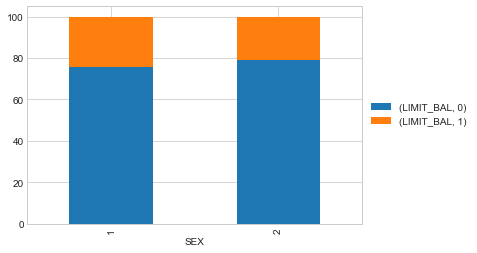

In [4]:
#SEX
x_chart = temp3.pivot_table(values=['LIMIT_BAL'], index=['SEX'], columns=['DEF_FLAG'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

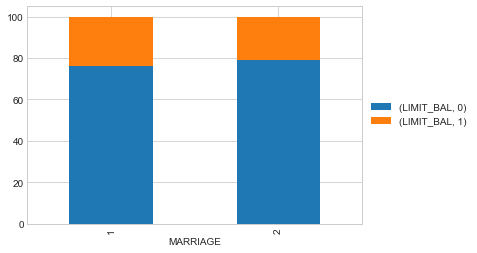

In [5]:
#MARRIAGE
x_chart = temp3.pivot_table(values=['LIMIT_BAL'], index=['MARRIAGE'], columns=['DEF_FLAG'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

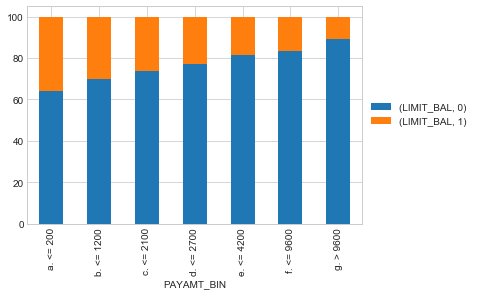

In [6]:
#PAYAMT_BIN
temp3['PAYAMT_SUM'] = temp3['PAYAMT_SEP05'] + temp3['PAYAMT_AUG05'] + temp3['PAYAMT_JUL05'] + temp3['PAYAMT_JUN05'] + temp3['PAYAMT_MAY05'] + temp3['PAYAMT_APR05']
temp3['PAYAMT_AVG'] = temp3['PAYAMT_SUM']/6

def bin_x (x): 
    if x <= 200: return 'a. <= 200'
    elif x <= 1200: return 'b. <= 1200'
    elif x <= 2100: return 'c. <= 2100'
    elif x <= 2700: return 'd. <= 2700'
    elif x <= 4200: return 'e. <= 4200'
    elif x <= 9600: return 'f. <= 9600'
    else: return 'g. > 9600'
temp3['PAYAMT_BIN'] = temp3['PAYAMT_AVG'].apply(bin_x)
    
x_chart = temp3.pivot_table(values=['LIMIT_BAL'], index=['PAYAMT_BIN'], columns=['DEF_FLAG'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

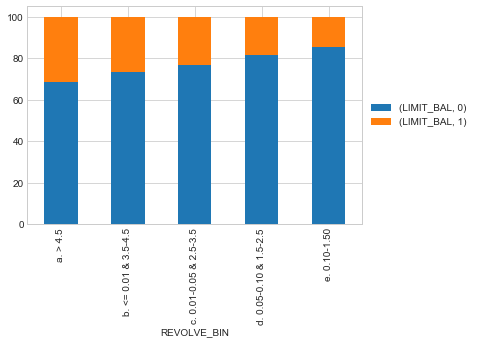

In [7]:
#REVOLVE_BIN
temp3['BILLAMT_SUM'] = temp3['BILLAMT_SEP05'] + temp3['BILLAMT_AUG05'] + temp3['BILLAMT_JUL05'] + temp3['BILLAMT_JUN05'] + temp3['BILLAMT_MAY05'] + temp3['BILLAMT_APR05']
temp3['REVOLVE_SUM'] = temp3['BILLAMT_SUM'] / temp3['LIMIT_BAL']

def bin_x (x): 
    if x <= 0.01: return 'b. <= 0.01 & 3.5-4.5';
    elif x <= 0.05: return 'c. 0.01-0.05 & 2.5-3.5';
    elif x <= 0.10: return 'd. 0.05-0.10 & 1.5-2.5';
    elif x <= 1.50: return 'e. 0.10-1.50';
    elif x <= 2.50: return 'd. 0.05-0.10 & 1.5-2.5';
    elif x <= 3.50: return 'c. 0.01-0.05 & 2.5-3.5';
    elif x <= 4.50: return 'b. <= 0.01 & 3.5-4.5';
    else: return 'a. > 4.5';
temp3['REVOLVE_BIN'] = temp3['REVOLVE_SUM'].apply(bin_x)
    
x_chart = temp3.pivot_table(values=['LIMIT_BAL'], index=['REVOLVE_BIN'], columns=['DEF_FLAG'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

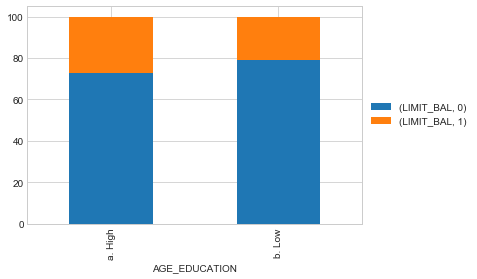

In [8]:
#AGE_EDUCATION
def bin_x (x): 
    if x <= 25: return 'a. 0-25 & 46-70'
    elif x <= 45: return 'b. 26-45'
    else: return 'a. 0-25 & 46-70'
temp3['AGE_BIN'] = temp3['AGE'].apply(bin_x)

def bin_x (x): 
    x1 = x[0]
    x2 = x[1]
    if x1 == 'a. 0-25 & 46-70' and x2 == 1: return 'b. Low';
    elif x1 == 'a. 0-25 & 46-70' and x2 == 2: return 'a. High';
    elif x1 == 'a. 0-25 & 46-70' and x2 == 3: return 'a. High';
    elif x1 == 'b. 26-45' and x2 == 1: return 'b. Low';
    else: return 'b. Low';
temp3['AGE_EDUCATION'] = temp3[['AGE_BIN','EDUCATION']].apply(bin_x,axis=1)

x_chart = temp3.pivot_table(values=['LIMIT_BAL'], index=['AGE_EDUCATION'], columns=['DEF_FLAG'], aggfunc='count')
x_chart = x_chart.apply(lambda c: c / c.sum() * 100, axis=1)
x_chart.plot(kind="bar",stacked=True)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [9]:
temp = temp3[['SEX', 'MARRIAGE', 'PAYAMT_BIN', 'REVOLVE_BIN', 'AGE_EDUCATION', 'DEF_FLAG']].copy()

# Final Dataset for Model Development

* Total rows = 29,148
* Train rows = 20,403
* Test rows  =  8,745

In [10]:
cat_feats = ['SEX', 'MARRIAGE', 'PAYAMT_BIN', 'REVOLVE_BIN', 'AGE_EDUCATION']
final_data = pd.get_dummies(temp,columns=cat_feats,drop_first=True)
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29148 entries, 0 to 29999
Data columns (total 14 columns):
DEF_FLAG                              29148 non-null int64
SEX_2                                 29148 non-null uint8
MARRIAGE_2                            29148 non-null uint8
PAYAMT_BIN_b. <= 1200                 29148 non-null uint8
PAYAMT_BIN_c. <= 2100                 29148 non-null uint8
PAYAMT_BIN_d. <= 2700                 29148 non-null uint8
PAYAMT_BIN_e. <= 4200                 29148 non-null uint8
PAYAMT_BIN_f. <= 9600                 29148 non-null uint8
PAYAMT_BIN_g. > 9600                  29148 non-null uint8
REVOLVE_BIN_b. <= 0.01 & 3.5-4.5      29148 non-null uint8
REVOLVE_BIN_c. 0.01-0.05 & 2.5-3.5    29148 non-null uint8
REVOLVE_BIN_d. 0.05-0.10 & 1.5-2.5    29148 non-null uint8
REVOLVE_BIN_e. 0.10-1.50              29148 non-null uint8
AGE_EDUCATION_b. Low                  29148 non-null uint8
dtypes: int64(1), uint8(13)
memory usage: 825.5 KB


In [11]:
x = final_data.drop(['DEF_FLAG'],axis=1)
y = final_data['DEF_FLAG']
x_train, x_test, y_train, y_test = train_test_split(x,y,stratify=y,test_size=0.3,random_state=101)

# Neural Net - Building the Model

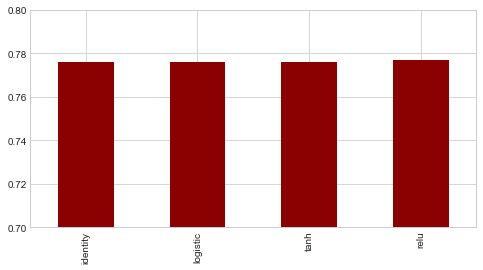

In [12]:
results = []
activation_options = ['identity', 'logistic', 'tanh', 'relu']
for neurons in activation_options:
    model = MLPClassifier(activation=neurons,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, activation_options).plot(kind="bar",color="darkred",ylim=(0.7,0.8))

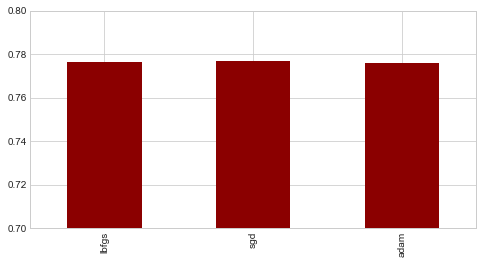

In [13]:
results = []
solver_options = ['lbfgs', 'sgd', 'adam']
for neurons in solver_options:
    model = MLPClassifier(activation='logistic',solver=neurons,random_state=101)
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test)
    accuracy = np.mean(y_test==y_pred)
    results.append(accuracy)

plt.figure(figsize=(8,4))
pd.Series(results, solver_options).plot(kind="bar",color="darkred",ylim=(0.7,0.8))

In [14]:
results = []

In [15]:
model = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(5,5),random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test==y_pred)
results.append(accuracy)

In [16]:
model = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(10,10),random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test==y_pred)
results.append(accuracy)

In [17]:
model = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(25,25),random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test==y_pred)
results.append(accuracy)

In [18]:
model = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(50,50),random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test==y_pred)
results.append(accuracy)

In [19]:
model = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(100,100),random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test==y_pred)
results.append(accuracy)

In [20]:
model = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(250,250),random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test==y_pred)
results.append(accuracy)

In [21]:
model = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(500,500),random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)
accuracy = np.mean(y_test==y_pred)
results.append(accuracy)

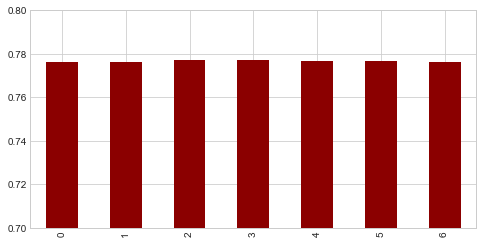

In [22]:
plt.figure(figsize=(8,4))
pd.Series(results, range(7)).plot(kind="bar",color="darkred",ylim=(0.7,0.8))

# Neural Net - Predictions and Evaluation

In [23]:
model = MLPClassifier(activation='logistic',solver='lbfgs',hidden_layer_sizes=(100,100),random_state=101)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

df_table = confusion_matrix(test_calc['DEF_FLAG'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[6790    2]
 [1951    2]]
accuracy: 0.77667238422
precision: 0.5
recall: 0.00102406554019
f1 score:  0.00204394481349


# Logistic Regression

In [24]:
lr =  LogisticRegression()
lr.fit(x_train, y_train)
y_pred=lr.predict(x_test)

In [25]:
test_calc = pd.concat([pd.DataFrame(y_test).reset_index(drop=True),pd.DataFrame(y_pred).reset_index(drop=True)],axis=1)
test_calc.rename(columns={0: 'predicted'}, inplace=True)

test_calc['predicted'] = test_calc['predicted'].apply(lambda x: 1 if x > 0.5 else 0)
df_table = confusion_matrix(test_calc['DEF_FLAG'],test_calc['predicted'])
print (df_table)

print('accuracy:', (df_table[0,0] + df_table[1,1]) / (df_table[0,0] + df_table[0,1] + df_table[1,0] + df_table[1,1]))
print ('precision:', df_table[1,1] / (df_table[1,1] + df_table[0,1]))
print('recall:', df_table[1,1] / (df_table[1,1] + df_table[1,0]))

p = df_table[1,1] / (df_table[1,1] + df_table[0,1])
r = df_table[1,1] / (df_table[1,1] + df_table[1,0])
print('f1 score: ', (2*p*r)/(p+r))

[[6777   15]
 [1942   11]]
accuracy: 0.776214979989
precision: 0.423076923077
recall: 0.00563236047107
f1 score:  0.011116725619
